# **DATA AGGREGATION**

In this course, we'll learn the following:

Data aggregation
How to combine data
How to transform data
How to clean strings with pandas
How to handle missing and duplicate data
You'll need some basic knowledge of pandas and matplotlib to complete this course, including:

Basic knowledge of pandas dataframes and series
How to select values and filter a dataframe
Knowledge of data exploration methods in pandas, such as the info and head methods
How to create visualizations in pandas and matplotlib
All of these prerequisites are taught in our Pandas and NumPy Fundamentals, Exploratory Data Visualization, and Storytelling Through Data Visualization courses. If you haven't completed those courses and aren't comfortable with the concepts above, we suggest completing them before continuing here.

In this course, we'll work with the World Happiness Report, an annual report created by the UN Sustainable Development Solutions Network with the intent of guiding policy. The report assigns each country a happiness score based on the answers to a poll question that asks respondents to rank their life on a scale of 0 - 10.

It also includes estimates of factors that may contribute to each country's happiness, including economic production, social support, life expectancy, freedom, absence of corruption, and generosity, to provide context for the score. Although these factors aren't actually used in the calculation of the happiness score, they can help illustrate why a country received a certain score.

Throughout this course, we'll work to answer the following questions:

How can aggregating the data give us more insight into happiness scores?
How did world happiness change from 2015 to 2017?
Which factors contribute the most to the happiness score?
In this mission, we'll start by learning how to aggregate data. Then in the following missions, we'll learn different data cleaning skills that can help us aggregate and analyze the data in different ways. We'll start by learning each topic in isolation, but build towards a more complete data cleaning workflow by the end of the course.

Use the pd.read_csv() function to read the World_Happiness_2015.csv file into a dataframe called happiness2015.
Store the first five rows of the dataframe in a variable called first_5.
Use the DataFrame.info() method to print information about the dataframe.
After you have run your code, use the variable inspector to look at the variable first_5 and the output to get familiar with the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

happiness2015 = pd.read_csv('World_Happiness_2015.csv')
first_5 = happiness2015.head()
#first_5 = happiness2015.iloc[0:5]
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

First, let's visualize the happiness score of each country in happiness2015:

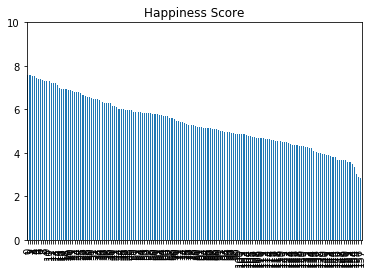

In [2]:
happiness2015['Happiness Score'].plot(kind = 'bar', title = 'Happiness Score', ylim = (0,10)) #pandas method

Plotting the data in its current form isn't helpful at all! There are so many data points that we can't see any of the values or labels.

You may have noticed that each country in the happiness2015 dataframe is assigned to a region, specified in the Region column. We can use the Series.unique() method to confirm the unique regions:

In [3]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Let's try plotting just one region next:



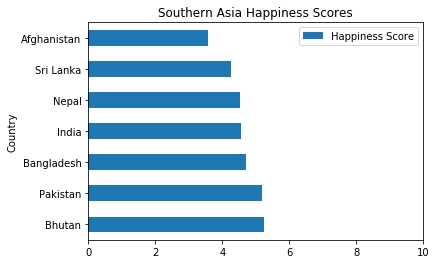

In [4]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']
so_asia.plot(x = 'Country', y = 'Happiness Score', kind = 'barh', title = 'Southern Asia Happiness Scores', xlim = (0,10))

## **Using Loops to Aggregate Data**

Create an empty dictionary named mean_happiness to store the results of this exercise.
Use the Series.unique() method to create an array of unique values for the Region column.
Use a for loop to iterate over the unique region values from the Region column.
Assign the rows belonging to the current region to a variable named region_group.
Use the Series.mean() method to calculate the mean happiness score for region_group.
Assign the mean value to the mean_happiness dictionary, using the region name as the key and the mean happiness score as the value.

In [5]:
mean_happiness = {}

reg_cols = happiness2015['Region'].unique()

for r in reg_cols:
    region_group = happiness2015[happiness2015['Region'] == r]
    region_mean = region_group['Happiness Score'].mean()
    mean_happiness[r] = region_mean
    
print(mean_happiness)

{'Western Europe': 6.689619047619048, 'North America': 7.273, 'Australia and New Zealand': 7.285, 'Middle East and Northern Africa': 5.406899999999999, 'Latin America and Caribbean': 6.144681818181818, 'Southeastern Asia': 5.317444444444445, 'Central and Eastern Europe': 5.332931034482758, 'Eastern Asia': 5.626166666666666, 'Sub-Saharan Africa': 4.202800000000001, 'Southern Asia': 4.580857142857143}


Let's break down the code we wrote in the previous screen into three steps:

Split the dataframe into groups.
Apply a function to each group.
Combine the results into one data structure.

In [6]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group. Function applied towards 'Happiness Score' column
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean

## **Creating GroupBy Objects**

The first step in the groupby operation is to create a GroupBy object:

To create a GroupBy object, we use the DataFrame.groupby() method:

df.groupby('col')

where col is the column you want to use to group the data set. Note that you can also group the data set on multiple columns by passing a list into the DataFrame.groupby() method. However, for teaching purposes, we'll focus on grouping the data by just one column in this mission.

When choosing the column, think about which columns could be used to split the data set into groups. To put it another way, look at columns with the same value for multiple rows.

When choosing the column, think about which columns could be used to split the data set into groups. To put it another way, look at columns with the same value for multiple rows.

We can see from the couple of rows above that the Region column fits this criteria. Let's confirm the number of regions and the number of unique values in each region for the entire dataframe with the Series.value_counts() method next:

In [9]:
happiness2015['Region'].value_counts()

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

Since there's a small number of groups and each group contains more than one unique value, we can confirm the Region column is a good candidate to group by.

Next, let's create a Groupby object and group the dataframe by the Region column:

In [10]:
happiness2015.groupby('Region')

Finally, let's print the results:

In [11]:
print(happiness2015.groupby('Region'))

Don't be alarmed! This isn't an error. This is telling us that an object of type GroupBy was returned, just like we expected.

Before we start aggregating data, we'll build some intuition around GroupBy objects. We'll start by using the GroupBy.get_group() method to select data for a certain group.

As an example, to select the data for just the North America group, we'd pass 'North America' into the get_group() method as follows:

In [12]:
grouped = happiness2015.groupby('Region')
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [13]:
grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')

print(aus_nz)

       Country                     Region  Happiness Rank  Happiness Score  \
8  New Zealand  Australia and New Zealand               9            7.286   
9    Australia  Australia and New Zealand              10            7.284   

   Standard Error  Economy (GDP per Capita)   Family  \
8         0.03371                   1.25018  1.31967   
9         0.04083                   1.33358  1.30923   

   Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
8                   0.90837  0.63938                        0.42922   
9                   0.93156  0.65124                        0.35637   

   Generosity  Dystopia Residual  
8     0.47501            2.26425  
9     0.43562            2.26646  


## **Exploring GroupBy Objects**

In the last exercise, we used the GroupBy.get_group() method to select the Australia and New Zealand group. The result is a dataframe containing just the rows for the countries in the Australia and New Zealand group:

In [14]:
grouped.get_group('Australia and New Zealand')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We can also use the GroupBy.groups attribute to get more information about the GroupBy object:

In [15]:
grouped = happiness2015.groupby('Region')
grouped.groups

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110,
             126, 129, 133],
            dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99], dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118],
            dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 102,
             106, 107, 109, 111, 134, 135, 155],
            dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 'Southeastern Asia': Int64Index([23, 33, 60, 73, 74, 89, 98, 128, 144], dtype='int64'),
 'Southern Asia': Int64Index([78, 80, 108, 116, 120, 131, 152], dtype='int64'),
 'Sub-Saharan

The result is a dictionary in which each key corresponds to a region name. See above for the first couple of keys:

**Notice that the values include the index for each row in the original happiness2015 dataframe with the corresponding region name.** To prove this, let's again look at the data for the Australia and New Zealand group:

'Australia and New Zealand': Int64Index([8, 9], dtype='int64')

Then, let's filter on indexes 8 and 9 in happiness2015:

In [16]:
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


And we see that those rows correspond to Australia and New Zealand! Notice that the get_group() method also returned the same dataframe above.

Next, let's continue building our intuition by practicing using the groups attribute and get_group() method.

For the following exercise, use the result from the dictionary returned by grouped.groups shown below:

'North America': Int64Index([4, 14], dtype='int64'

Prove that the values for the 'North America' group in the dictionary returned by grouped.groups above correspond to countries in North America in the happiness2015 dataframe.
Use the snippet above to identify the indexes of the countries in happiness2015 that belong to the North America group.
Use the indexes to assign just the countries in North America in happiness2015 to north_america.
Use the GroupBy.get_group() method to select the data for the North America group only. Assign the result to na_group.
Use the following code to compare north_america and na_group: north_america == na_group. Assign the result to equal.

In [17]:
grouped = happiness2015.groupby('Region')
north_america = happiness2015.iloc[[4,14]]
na_group = grouped.get_group('North America')
equal = north_america == na_group

print(equal)

    Country  Region  Happiness Rank  Happiness Score  Standard Error  \
4      True    True            True             True            True   
14     True    True            True             True            True   

    Economy (GDP per Capita)  Family  Health (Life Expectancy)  Freedom  \
4                       True    True                      True     True   
14                      True    True                      True     True   

    Trust (Government Corruption)  Generosity  Dystopia Residual  
4                            True        True               True  
14                           True        True               True  


## **Common Aggregation Methods with Groupby**

In the last exercise, we confirmed that the values for the 'North America' group returned by grouped.groups do correspond to the countries in North_America in the happiness2015 dataframe.

Now that we have a good understanding of GroupBy objects, let's use them to aggregate our data. In order to aggregate our data, we must call a function on the GroupBy object.

A basic example of aggregation is computing the number of rows for each of the groups. **We can use the GroupBy.size() method to confirm the size of each region group:**

In [18]:
grouped = happiness2015.groupby('Region') #frequency counts
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

In [19]:
happiness2015.groupby('Region').size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

Notice that the result is a Series and contains just one value for each group. Each value represents the number of rows in each group. For example, the 'Australia and New Zealand' group contains two rows.

Pandas has built in a number of other common aggregation methods:

Methods	Description
mean()	Calculates the mean of groups.
sum()	Calculates the sum of group values.
size()	Calculates the size of the groups.
count()	Calculates the count of values in groups.
min()	Calculates the minimum of group values.
max()	Calculates the maximum of group values.

Apply the GroupBy.mean() method to grouped. Assign the result to means.

In [20]:
grouped = happiness2015.groupby('Region')
means = grouped.mean()

# **Aggregating Specific Columns with Groupby**

In the last exercise, we grouped happiness2015 by region and calculated the mean of each region for each numeric column:
    
Below are the results:

In [21]:
grouped = happiness2015.groupby('Region')
grouped.mean()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066973,0.920490,0.705616,0.361751,0.181702,0.190375,1.980009
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


You may have noticed that Region appears in a different row than the rest of the column names. **Because we grouped the dataframe by region, the unique values in Region are used as the index.** Up until now, we've mostly worked with dataframes with a numeric index.

In some cases, we may only wish to aggregate one particular column in the original dataframe. GroupBy objects actually support column indexing, just like dataframes. You can select specific columns for a GroupBy object the same way you would for a dataframe:


Select by Label	Syntax
Single column	GroupBy["col1"]
List of columns	GroupBy[["col1", "col2"]]

Select just the Happiness Score column from grouped. Assign the result to happy_grouped.
Use the GroupBy.mean() method to compute the mean of happy_grouped. Assign the result to happy_mean.

In [22]:
grouped = happiness2015.groupby('Region')

happy_grouped = grouped['Happiness Score']

happy_mean = happy_grouped.mean()

## **Introduction to the Agg() Method**

We learned in the last exercise that we can use indexing to aggregate just one column at a time:

In [23]:
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()

print(happy_mean)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


However, what if we wanted to apply more than one kind of aggregation to a column at a time?

For example, suppose we wanted to calculate both the mean and maximum happiness score for each region. Using what we learned so far, we'd have to first calculate the mean, like we did above, and then calculate the maximum separately.

**Luckily, however, the GroupBy.agg() method can perform both aggregations at once. We can use the following syntax:**

GroupBy.agg([func_name1,func_name2,func_name3])

Note that when we pass the functions into the agg() method as arguments, we don't use parentheses after the function names. For example, when we use np.mean, we refer to the function object itself and treat it like a variable, whereas np.mean() would be used to call the function and get the returned value.

The function names can also be passed in as strings, but we won't cover that explicitly in this mission. You can refer to this documentation for more information on this topic.

Let's practice using the agg() method next.

Apply the GroupBy.agg() method to happy_grouped. Pass a list containing np.mean and np.max into the method. Assign the result to happy_mean_max.
As noted above, passing 'mean' and 'max' into the GroupBy.agg() method will also return the same results. However, for answer checking purposes, you'll have to use np.mean and np.max.
We've also created a custom function named dif to calculate the difference between the mean and maximum values. Pass dif into the GroupBy.agg() method. Assign the result to mean_max_dif.

In [24]:
import numpy as np
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']

def dif(group):
    return (group.max() - group.mean())

#happy_mean = happy_grouped.mean() #single function
happy_mean_max = happy_grouped.agg([np.mean, np.max, dif]) #the functions we want to use

mean_max_dif = happy_grouped.agg(dif)

print(happy_mean_max)

#R mean_scores <- happiness2015 %>%
#R  group_by(region) %>% 
#R  summarize(avg = mean(happiness_score), max = max(happiness_score))

                                     mean   amax       dif
Region                                                    
Australia and New Zealand        7.285000  7.286  0.001000
Central and Eastern Europe       5.332931  6.505  1.172069
Eastern Asia                     5.626167  6.298  0.671833
Latin America and Caribbean      6.144682  7.226  1.081318
Middle East and Northern Africa  5.406900  7.278  1.871100
North America                    7.273000  7.427  0.154000
Southeastern Asia                5.317444  6.798  1.480556
Southern Asia                    4.580857  5.253  0.672143
Sub-Saharan Africa               4.202800  5.477  1.274200
Western Europe                   6.689619  7.587  0.897381


In the last exercise, we learned we can use the GroupBy.agg() method to:

Perform more than one aggregation at once.
Compute custom aggregations.
To compute multiple aggregations at once, we passed a list of the function names into the agg method:

In [25]:
import numpy as np

grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean_max = happy_grouped.agg([np.mean, np.max])

#R mean_scores <- happiness2015 %>%
#R   group_by(region) %>% 
#R  summarize(avg = mean(happiness_score), max = max(happiness_score))


## **Computing Multiple and Custom Aggregations with the Agg() Method**

In the last exercise, we learned we can use the GroupBy.agg() method to:

Perform more than one aggregation at once.
Compute custom aggregations.
To compute multiple aggregations at once, we passed a list of the function names into the agg method:

In [26]:
happy_mean_max = happiness2015.groupby('Region')['Happiness Score'].agg([np.mean, np.max])
#R mean_scores <- happiness2015 %>% group_by(region) %>% summarize(avg = mean(happiness_score), max = max(happiness_score))

print(happy_mean_max)

                                     mean   amax
Region                                          
Australia and New Zealand        7.285000  7.286
Central and Eastern Europe       5.332931  6.505
Eastern Asia                     5.626167  6.298
Latin America and Caribbean      6.144682  7.226
Middle East and Northern Africa  5.406900  7.278
North America                    7.273000  7.427
Southeastern Asia                5.317444  6.798
Southern Asia                    4.580857  5.253
Sub-Saharan Africa               4.202800  5.477
Western Europe                   6.689619  7.587


Our result is a dataframe containing both the mean and maximum happiness scores for each region. Note that the columns are named for the functions themselves. Because np.max is an alias for np.amax, the column for the maximum is named amax.

We also used a custom function to aggregate the data:

In [27]:
def dif(group):
    return(group.max() - group.mean())
happy_grouped.agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

Above, we calculated the difference between the mean and maximum values for each region. Because the agg() method allows us to create custom aggregation functions, it gives us much more flexibility in how we can transform our data.

Up until this point, we've deliberately split creating the GroupBy object and calling a function into separate steps to make it easier to understand. However, if you read through other teaching resources, you may see instances in which the statements are combined:

In [28]:
happiness2015.groupby('Region')['Happiness Score'].agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

Inspect the following code: happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean().
If we run the code above, will the index of happiness_means be the unique values in the Region column or the Happiness Score column?
Will the values aggregated in happiness_means be the values from the Region column or the Happiness Score column?
Print happiness_means. Were your predictions correct?

In [29]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
print(happiness_means)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


## **Aggregation with Pivot Tables**

In the last exercise, we tried to predict the results of the code below:



In [30]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()

print(happiness_means)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


Index and values are actually arguments used in another method used to aggregate data - the DataFrame.pivot_table() method. This df.pivot_table() method can perform the same kinds of aggregations as the df.groupby method and make the code for complex aggregations easier to read.

If you're an Excel user, you may have already drawn comparisons between the groupby operation and Excel pivot tables. If you've never used Excel, don't worry! No prior knowledge is needed for this mission. We'll demonstrate the pivot_table() method next.

Below, we use the df.pivot_table() method to perform the same aggregation as above.

Below, we use the df.pivot_table() method to perform the same aggregation as above.

In [32]:
happiness2015.pivot_table(values = 'Happiness Score', index = 'Region', aggfunc = np.mean)

#output is a dataframe

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


**Keep in mind that this method returns a dataframe,** so normal dataframe filtering and methods can be applied to the result. For example, let's use the DataFrame.plot() method to create a visualization. **Note that we exclude aggfunc below because the mean is the default aggregation function of df.pivot_table().**

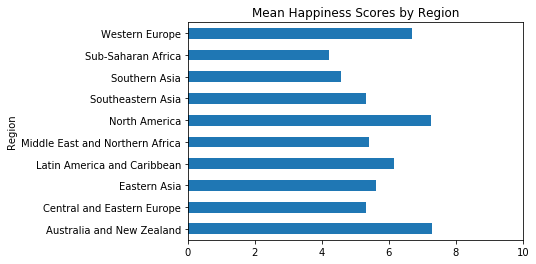

In [33]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind = 'barh', title = 'Mean Happiness Scores by Region', xlim = (0,10), legend = False)

Next, let's explore a feature unique to the df.pivot_table() method.

We've already updated pv_happiness by setting the margins parameter equal to True.

Plot the resulting dataframe, pv_happiness, using the df.plot() method. Set kind to barh, xlim to (0,10), title to 'Mean Happiness Scores by Region', and legend to False. What do you notice about this results?
Calculate the mean of the Happiness Score column in the original happiness 2015 data set. Assign the result to world_mean_happiness.
Does world_mean_happiness equal the value for the All group? If you can't figure out the answer, don't worry! We'll review this question on the next screen.

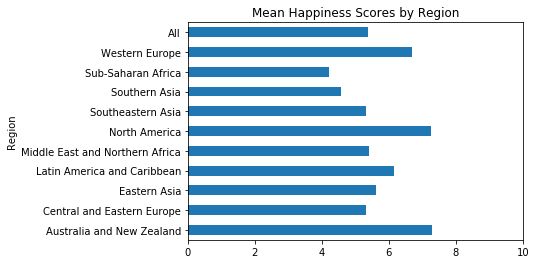

In [34]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)

#enter code below

pv_happiness.plot(kind = 'barh', title = 'Mean Happiness Scores by Region', xlim = (0,10), legend = False)

world_mean_happiness = happiness2015['Happiness Score'].mean()

# **Aggregating Multiple Columns and Functions with Pivot Tables**

In the last exercise, we learned that **when we set the margins parameter equal to True, All will be added to the index of the resulting dataframe and the corresponding value will be the result of applying the aggregation method to the entire column.** In our example, **All is the mean of the Happiness Score column.**

The pivot_table method also allows us to aggregate multiple columns and apply multiple functions at once.

In [35]:
happiness2015.pivot_table(['Happiness Score','Family'], 'Region')
#outputs a dataframe

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


To apply multiple functions, we can pass a **list of the functions into the aggfunc parameter:**

In [36]:
happiness2015.pivot_table(['Happiness Score','Family'], 'Region', aggfunc=[np.mean, np.min, np.max], margins = True)


mean                     amin  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.30923   
Central and Eastern Europe       1.053042        5.332931  0.38562   
Eastern Asia                     1.099427        5.626167  0.94675   
Latin America and Caribbean      1.104720        6.144682  0.74302   
Middle East and Northern Africa  0.920490        5.406900  0.47489   
North America                    1.284860        7.273000  1.24711   
Southeastern Asia                0.940468        5.317444  0.62736   
Southern Asia                    0.645321        4.580857  0.30285   
Sub-Saharan Africa               0.809085        4.202800  0.00000   
Western Europe                   1.247302        6.689619  0.89318   
All                              0.991046        5.375734  0.00000   

                                                    amax                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.284  1.31967           7.286  
Central and Eastern Europe                4.218  1.34043           6.505  
Eastern Asia                              4.874  1.30060           6.298  
Latin America and Caribbean               4.518  1.30477           7.226  
Middle East and Northern Africa           3.006  1.22393           7.278  
North America                             7.119  1.32261           7.427  
Southeastern Asia                         3.819  1.26504           6.798  
Southern Asia                             3.575  1.10395           5.253  
Sub-Saharan Africa                        2.839  1.18468           5.477  
Western Europe                            4.857  1.40223           7.587  
All                                       2.839  1.40223           7.587

In [37]:
happiness2015.pivot_table(['Happiness Score','Family'], 'Region', aggfunc=[np.mean, np.min, np.max], margins = True)
#[] brackets

mean                     amin  \
                                   Family Happiness Score   Family   
Region                                                               
Australia and New Zealand        1.314450        7.285000  1.30923   
Central and Eastern Europe       1.053042        5.332931  0.38562   
Eastern Asia                     1.099427        5.626167  0.94675   
Latin America and Caribbean      1.104720        6.144682  0.74302   
Middle East and Northern Africa  0.920490        5.406900  0.47489   
North America                    1.284860        7.273000  1.24711   
Southeastern Asia                0.940468        5.317444  0.62736   
Southern Asia                    0.645321        4.580857  0.30285   
Sub-Saharan Africa               0.809085        4.202800  0.00000   
Western Europe                   1.247302        6.689619  0.89318   
All                              0.991046        5.375734  0.00000   

                                                    amax                  
                                Happiness Score   Family Happiness Score  
Region                                                                    
Australia and New Zealand                 7.284  1.31967           7.286  
Central and Eastern Europe                4.218  1.34043           6.505  
Eastern Asia                              4.874  1.30060           6.298  
Latin America and Caribbean               4.518  1.30477           7.226  
Middle East and Northern Africa           3.006  1.22393           7.278  
North America                             7.119  1.32261           7.427  
Southeastern Asia                         3.819  1.26504           6.798  
Southern Asia                             3.575  1.10395           5.253  
Sub-Saharan Africa                        2.839  1.18468           5.477  
Western Europe                            4.857  1.40223           7.587  
All                                       2.839  1.40223           7.587

Use the df.groupby() method to calculate the minimum, maximum, and mean family and happiness scores for each region in happiness2015.
Group happiness2015 by the Region column.
Select the Happiness Score and Family columns. Assign the result to grouped.
Apply the GroupBy.agg() method to grouped. Pass a list containing np.min, np.max, and np.mean into the method.
Assign the result to happy_family_stats.
Use the pivot_table method to return the same information, but also calculate the the minimum, maximum, and mean for the entire Family and Happiness Score columns.
The aggregation columns should be Happiness Score and Family.
The column to group by is Region.
The aggregation functions are np.min, np.max, and np.mean.
Set the margins parameter equal to True.
Assign the result to pv_happy_family_stats.

In [38]:
grouped = happiness2015.groupby('Region')[['Happiness Score','Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])

pv_happy_family_stats = happiness2015.pivot_table(['Happiness Score','Family'], 'Region', aggfunc = [np.min, np.max, np.mean], margins = True)
#dont forget the equal sign for aggfunc = 

In this mission, we learned how to use the groupby operation and the df.pivot_table() method for aggregation. In the next mission, we'll learn how to combine data sets using the pd.concat() and pd.merge() functions.